In [1]:
#######################################################
#######################################################
#######################################################

## Topic Modeling In N L P: Topic Modeling : EXERCISES ANSWERS ##

#### Exercise ####


#### Please refer to module 2 of TopicModelingInNLP - TopicModeling for Tasks 1-5
#### Task 1:
##### Add the packages needed for creating and working with an LDA model.
#### Result:


In [2]:
import pandas as pd
import numpy as np
from pprint import pprint

# Packages with tools for text processing.
import nltk

nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import gensim
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel

# Plotting tools.
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Task 2:
##### Use `Path` module from `pathlib` to point `data_dir` to your data directory.
#### Result:


In [3]:
from pathlib import Path

# Set `home_dir` to the root directory of your computer.
home_dir = Path(".").resolve()
# Set `main_dir` to the location of your `course` folder.
main_dir = home_dir.parent.parent
# Make `data_dir` from the `main_dir` and remainder of the path to data directory.
data_dir = str(main_dir) + "/data"
plot_dir = str(main_dir) + "/plots"

#### Task 3:
##### Read in the "UN_agreement_titles.csv" dataset and save the dataframe as `ex_df`.
##### Remove all rows from the dataset where `title` is empty. 
##### Subset the `title` column from `ex_df` and call it `ex_df_text`.
##### Tokenize all documents in `ex_df_text` into a list of tokenized documents and save it as `ex_df_tokenized`.
#### Result:


In [4]:
ex_df = pd.read_csv(str(data_dir) + "/" + "UN_agreement_titles.csv")
# Drop NAs if any.
ex_df = ex_df.dropna(subset=["title"]).reset_index(drop=True)

# Isolate the `snippet` column.
ex_df_text = ex_df["title"]

# Tokenize each document into a large list of tokenized documents.
ex_df_tokenized = [word_tokenize(ex_df_text[i]) for i in range(0, len(ex_df_text))]
print(ex_df_tokenized[0:5])

[['Agreement', 'concerning', 'arrangements', 'for', 'the', 'holding', 'of', 'the', 'fifth', 'session', 'of', 'the', 'Council', 'of', 'the', 'United', 'Nations', 'Relief', 'and', 'Rehabilitation', 'Administration', 'at', 'the', 'Palais', 'des', 'Nations', ',', 'Geneva', ',', 'concluded', 'between', 'the', 'United', 'Nations', ',', 'the', 'League', 'of', 'Nations', 'and', 'the', 'United', 'Nations', 'Relief', 'and', 'Rehabilitation', 'Administration'], ['Declaration', 'recognizing', 'as', 'compulsory', 'the', 'jurisdiction', 'of', 'the', 'Court', ',', 'in', 'conformity', 'with', 'Article', '36', ',', 'paragraph', '2', ',', 'of', 'the', 'Statute', 'of', 'the', 'International', 'Court', 'of', 'Justice', ',', 'in', 'all', 'legal', 'disputes', 'concerning', 'the', 'interpretation', ',', 'application', 'or', 'validity', 'of', 'any', 'treaty', 'relating', 'to', 'the', 'boundaries', 'of', 'British', 'Honduras', '.', 'London', ',', '13', 'February', '1946'], ['Declaration', 'renewing', 'for', 'a

#### Task 4:
##### For each tokenized document in `ex_df_tokenized`, do the following:
##### Convert the tokens to lowercase.
##### Get common English stopwords from `nltk.corpus` and remove them from tokenized document.
##### Remove punctuation and all non-alphabetical characters.
##### Perform stemming of tokens using `PorterStemmer()`.
##### Save the number of words in each document as a list and call it `ex_word_counts_per_document`.
##### Save the list of clean documents as `ex_df_clean`.
#### Result:


In [5]:
# Get common English stop words.
stop_words = stopwords.words("english")

# Create a list for clean documents.
ex_df_clean = [None] * len(ex_df_tokenized)

# Create a list of word counts for each clean document.
ex_word_counts_per_document = [None] * len(ex_df_tokenized)

# Process words in all documents.
for i in range(len(ex_df_tokenized)):
    # 1. Convert to lowercase.
    ex_df_clean[i] = [document.lower() for document in ex_df_tokenized[i]]
    # 2. Remove stop words.
    ex_df_clean[i] = [word for word in ex_df_clean[i] if not word in stop_words]
    # 3. Remove punctuation and any non-alphabetical characters.
    ex_df_clean[i] = [word for word in ex_df_clean[i] if word.isalpha()]
    # 4. Stem words.
    ex_df_clean[i] = [PorterStemmer().stem(word) for word in ex_df_clean[i]]
    # Record the word count per document.
    ex_word_counts_per_document[i] = len(ex_df_clean[i])

#### Task 5:
##### Convert word counts list and documents list to NumPy arrays and call them `ex_word_counts_array` and `ex_df_array` respectively.
##### Filter out all documents containing less than 4 words and save the filtered array as a list with the name `ex_df_clean`. Check how many valid documents are left.
#### Result:


In [6]:
ex_word_counts_array = np.array(ex_word_counts_per_document)
ex_df_array = np.array(ex_df_clean, dtype=object)
print(len(ex_df_array))

ex_valid_documents = np.where(ex_word_counts_array >= 4)[0]
ex_df_array = ex_df_array[ex_valid_documents]
print(len(ex_df_array))

# Convert the array back to a list.
ex_df_clean = ex_df_array.tolist()
print(ex_df_clean[0:3])

983
857
[['agreement', 'concern', 'arrang', 'hold', 'fifth', 'session', 'council', 'unit', 'nation', 'relief', 'rehabilit', 'administr', 'palai', 'de', 'nation', 'geneva', 'conclud', 'unit', 'nation', 'leagu', 'nation', 'unit', 'nation', 'relief', 'rehabilit', 'administr'], ['declar', 'recogn', 'compulsori', 'jurisdict', 'court', 'conform', 'articl', 'paragraph', 'statut', 'intern', 'court', 'justic', 'legal', 'disput', 'concern', 'interpret', 'applic', 'valid', 'treati', 'relat', 'boundari', 'british', 'hondura', 'london', 'februari'], ['declar', 'renew', 'period', 'five', 'year', 'begin', 'februari', 'declar', 'recogn', 'compulsori', 'jurisdict', 'court', 'conform', 'articl', 'paragraph', 'statut', 'intern', 'court', 'justic', 'legal', 'disput', 'concern', 'interpret', 'applic', 'valid', 'treati', 'relat', 'boundari', 'british', 'hondura', 'london', 'februari']]


#### Please refer to module 3 of TopicModelingInNLP - TopicModeling for Tasks 6-9
#### Task 6:
##### Given the list of processed documents `ex_df_clean`, set a seed for reproducibility, create a `gensim` dictionary of corpus `ex_df_clean` and save it as `ex_dictionary`.
##### Filter out from this dictionary words that occur in less than "5" documents and more than "0.5" documents. Remember that "0.5" is a fraction of the total corpus size.
##### Make sure to keep the first "200" most frequent words.
##### How many words are left in the dictionary?
#### Result:


In [7]:
# Set the seed.
np.random.seed(100)
ex_dictionary = gensim.corpora.Dictionary(ex_df_clean)

ex_dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=200)

# Words left in the dictionary.
len(ex_dictionary)
# Print dictionary keys and values
count = 0
for k, v in ex_dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 administr
1 arrang
2 concern
3 de
4 nation
5 relief
6 unit
7 applic
8 articl
9 compulsori
10 februari


#### Task 7:
##### Use the dictionary created in Task 6 to transform each document in `ex_df_clean` into  bag-of-words.
##### Build the `models.TfidfModel` transformation using the bag-of-words.
##### Apply this transformation to the entire corpus.
##### Inspect the TF-IDF scores for the first document.
#### Result:


In [8]:
ex_bow_corpus = [ex_dictionary.doc2bow(doc) for doc in ex_df_clean]
print(ex_bow_corpus[0])

# Define the transformation.
ex_tfidf = models.TfidfModel(ex_bow_corpus)

ex_corpus_tfidf = ex_tfidf[ex_bow_corpus]

# Preview TF-IDF scores for the first document.
for doc in ex_corpus_tfidf:
    pprint(doc)
    break

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 5), (5, 2), (6, 3)]
[(0, 0.37421377520832816),
 (1, 0.18710688760416408),
 (2, 0.06475646625501938),
 (3, 0.1593591956618582),
 (4, 0.7846615184322249),
 (5, 0.36478372202169385),
 (6, 0.21588294868103092)]


#### Task 8:
##### Use the clean corpus `ex_df_clean`, dictionary `ex_dictionary` and TF-IDF matrix for the corpus `ex_corpus_tfidf`, build a parallelized LDA model to detect 3 topics.
##### Use 3 workers and 2 passes for the LDA model. Save the model as `ex_lda_model_tfidf`.
##### Print all topics and the top words within them.
##### Classify the 2nd document as one of the 3 topics.
#### Result:


In [9]:
# Build model.
ex_lda_model_tfidf = gensim.models.LdaMulticore(
    ex_corpus_tfidf, num_topics=3, id2word=ex_dictionary, workers=3, passes=2
)

print(ex_lda_model_tfidf)

# Top words in each topic.
for idx, topic in ex_lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
# Classify the 2nd document.
for index, score in sorted(
    ex_lda_model_tfidf[ex_corpus_tfidf[1]], key=lambda tup: -1 * tup[1]
):
    print(
        "\nScore: {}\t \nTopic: {}".format(
            score, ex_lda_model_tfidf.print_topic(index, 10)
        )
    )

LdaMulticore<num_terms=200, num_topics=3, decay=0.5, chunksize=2000>
Topic: 0 Word: 0.023*"assist" + 0.023*"state" + 0.023*"unit" + 0.020*"america" + 0.020*"mutual" + 0.019*"amend" + 0.019*"note" + 0.018*"constitut" + 0.018*"defens" + 0.018*"relat"
Topic: 1 Word: 0.029*"loan" + 0.028*"amend" + 0.027*"convent" + 0.026*"govern" + 0.023*"extend" + 0.023*"note" + 0.021*"exchang" + 0.020*"concern" + 0.020*"constitut" + 0.018*"protocol"
Topic: 2 Word: 0.045*"commod" + 0.044*"sale" + 0.044*"agricultur" + 0.025*"develop" + 0.024*"credit" + 0.023*"concern" + 0.023*"amend" + 0.021*"exchang" + 0.021*"letter" + 0.020*"constitut"

Score: 0.8449630737304688	 
Topic: 0.023*"assist" + 0.023*"state" + 0.023*"unit" + 0.020*"america" + 0.020*"mutual" + 0.019*"amend" + 0.019*"note" + 0.018*"constitut" + 0.018*"defens" + 0.018*"relat"

Score: 0.07797370851039886	 
Topic: 0.045*"commod" + 0.044*"sale" + 0.044*"agricultur" + 0.025*"develop" + 0.024*"credit" + 0.023*"concern" + 0.023*"amend" + 0.021*"exchang"

#### Task 9:
##### Use the convenience function `compute_coherence_values()` from TopicModeling-3 slides to determine the best number of topics within the corpus. Remember to set a seed for reproducibility of your results.
##### Plot a graph of number of topics and their coherence scores. Label the X-axis as "Num Topics" and Y-axis as "Coherence Score".
##### What is the optimal number of topics according to you?
#### Result:


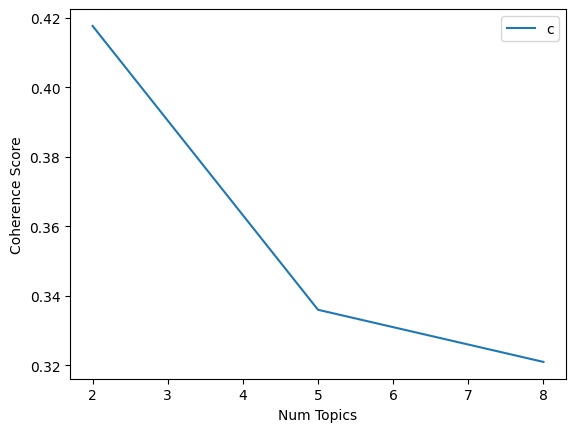

In [10]:
def compute_coherence_values(dictionary, corpus, texts, limit=10, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(
            corpus=corpus, id2word=dictionary, num_topics=num_topics
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence="c_v"
        )
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


np.random.seed(1)
ex_model_list, ex_coherence_values = compute_coherence_values(
    dictionary=ex_dictionary, corpus=ex_corpus_tfidf, texts=ex_df_clean
)

# Plot graph.
limit = 10
start = 2
step = 3
x = range(start, limit, step)
plt.plot(x, ex_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc="best")
plt.show()

#### Please refer to module 4 of TopicModelingInNLP - TopicModeling for Tasks 10-12
#### Task 10:
##### Using `pyLDAvis` package, prepare LDA vis object of the LDA model `ex_lda_model_tfidf` that you created in Task 8. Call this object as `ex_vis`.
##### Display the `ex_vis` object.
#### Result:


In [11]:
# Prepare LDA vis object.
ex_vis = pyLDAvis.gensim.prepare(
    ex_lda_model_tfidf,  # <- model object
    ex_corpus_tfidf,  # <- corpus object
    ex_dictionary,
)  # <- dictionary object

# Display.
pyLDAvis.display(ex_vis)

#### Task 11:
##### Loop through the corpus and find the best topic for each document. Hint: Use the convenience function `GetDocTopicPair` from TopicModeling-4 slides that takes in a document index, the corpus TF-IDF matrix and an LDA model to return a tuple of the document index, the best fit topic, and its probability.
##### Convert the list of tuples into a dataframe and call it `ex_doc_topic_pairs_df`.
##### Assign column names to `ex_doc_topic_pairs_df`.
#### Result:


In [12]:
# Convenience function
def GetDocTopicPair(doc_num, corpus, lda_model_tfidf):
    # Extract the vector of tf_idf weights for the document.
    doc_vec = corpus[doc_num]
    # Extract topic probabilities for that document.
    doc_topics = lda_model_tfidf.get_document_topics(doc_vec)
    max_prob = 0
    best_topic = 0
    for topic in doc_topics:
        if max_prob <= topic[1]:
            max_prob = topic[1]
            best_topic = topic[0]
    doc_topic_pair = (doc_num, best_topic, max_prob)
    return doc_topic_pair


# Create an empty list of the same length as the number of documents.
ex_doc_topic_pairs = [None] * ex_dictionary.num_docs
# Loop through the document indices.
for i in range(ex_dictionary.num_docs):
    # For each document index, get the document-topic tuple.
    ex_doc_topic_pairs[i] = GetDocTopicPair(i, ex_corpus_tfidf, ex_lda_model_tfidf)

print(ex_doc_topic_pairs[:5])

# Make a dataframe out of a list of tuples.
ex_doc_topic_pairs_df = pd.DataFrame(ex_doc_topic_pairs)

# Assign column names.
ex_doc_topic_pairs_df.columns = ["doc_id", "best_topic", "best_probability"]
print(ex_doc_topic_pairs_df.head())

[(0, 2, 0.7254368), (1, 0, 0.84495693), (2, 0, 0.85225695), (3, 0, 0.8039518), (4, 0, 0.64166516)]
   doc_id  best_topic  best_probability
0       0           2          0.725437
1       1           0          0.844957
2       2           0          0.852257
3       3           0          0.803952
4       4           0          0.641665


#### Task 12:
##### Find the original indices of valid documents that we kept in Task 5. Set them as the index of their respective documents in `ex_doc_topic_pairs_df`.
##### Find all the documents assigned to topic 1 (index = 0).
##### Sort the documents in decreasing order of probability.
##### Save the pyLDA vis object as an HTML file.
#### Result:


In [13]:
# Get original indices for each valid document.
ex_valid_documents = np.where(ex_word_counts_array >= 4)[0]
ex_doc_topic_pairs_df.index = ex_valid_documents
print(ex_doc_topic_pairs_df.iloc[0:10,])

ex_topic1_docs = ex_doc_topic_pairs_df.query("best_topic==0")
ex_topic1_docs = ex_topic1_docs.sort_values(by="best_probability", ascending=False)
print(ex_topic1_docs.head())


# Save the plot.
pyLDAvis.save_html(ex_vis, plot_dir + "/df_LDAvis.html")

    doc_id  best_topic  best_probability
0        0           2          0.725437
1        1           0          0.844957
2        2           0          0.852257
3        3           0          0.803952
4        4           0          0.641665
5        5           2          0.748043
6        6           0          0.788631
7        7           1          0.696686
8        8           2          0.728775
11       9           2          0.718844
     doc_id  best_topic  best_probability
884     767           0          0.864399
880     763           0          0.861592
883     766           0          0.852669
2         2           0          0.852257
879     762           0          0.850740
